In [1]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data, io, filters, exposure

###1. Write a program to implement histogram equalization on an image. Write and implement a code that
###(a) displays the histogram of the input image,
###(b) implements histogram equalization as discussed in class,
###(c) displays the equalized histogram,
###(d) plots the transform function corresponding to the pair of input and output histograms and
###(e) displays the image corresponding to the equalized histogram.

In [2]:
image1 = cv2.imread('image_1.jpg',1)
image2 = cv2.imread('image_2.jpg',1)
chestxray = cv2.imread('chestxray1.png',0)
hawkbay = cv2.imread('HawkesBay.jpg',0)
crayons = cv2.imread('crayons.jpg',1)

image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
crayons = cv2.cvtColor(crayons,cv2.COLOR_BGR2RGB)

In [3]:
def histogram_equalization(image):
    
    # extracting bin information
    hist,bins = np.histogram(image.flatten(),256,[0,256])
    
    # computing the cumulative sums of iamge and normalizing the image
    cdf = list(map(round,hist.cumsum()*255/sum(hist)))
    cdf = np.array(cdf)
    
    # returning the histogram equalized image
    return cdf[image], cdf[list(range(0,256))]

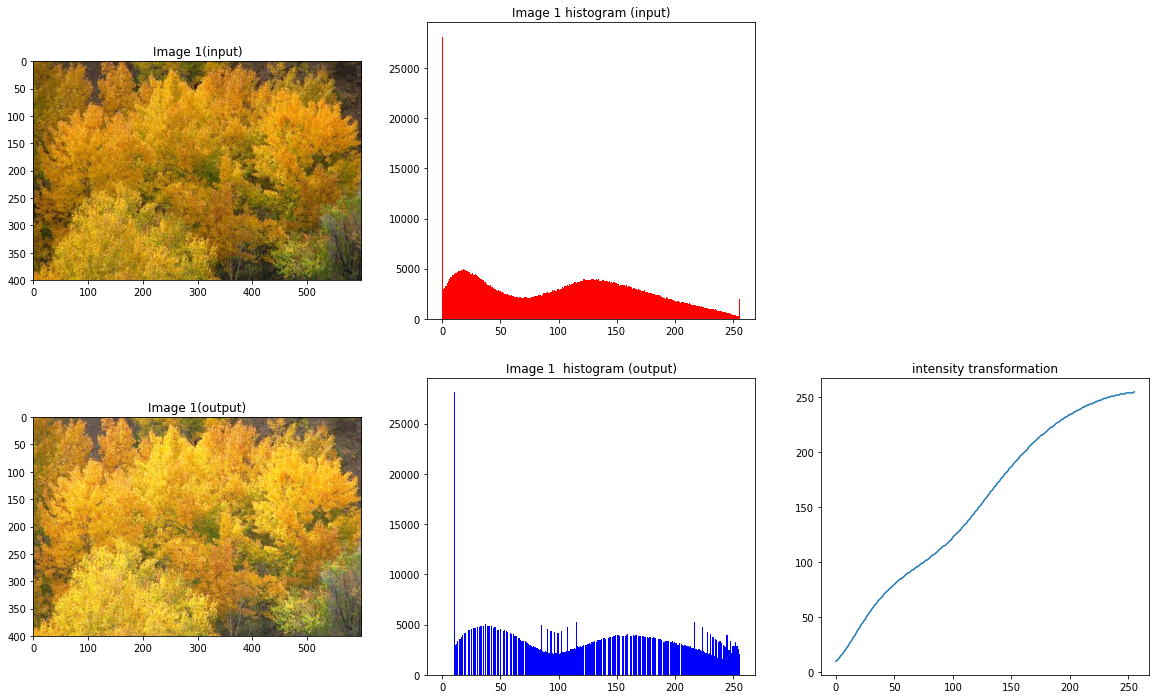

In [4]:
fig, axs = plt.subplots(2,3, figsize = (20,12))
axs[0,0].imshow(image1)
axs[0,0].set_title('Image 1(input)')
axs[0,1].hist(image1.flatten(),256,[0,256], color = 'r')[2]
axs[0,1].set_title('Image 1 histogram (input)')
axs[1,0].imshow(histogram_equalization(image1)[0])
axs[1,0].set_title('Image 1(output)')
axs[1,1].hist(histogram_equalization(image1)[0].flatten(),256,[0,256],color='b')
axs[1,1].set_title('Image 1  histogram (output)')
axs[1,2].plot(list(range(0,256)),histogram_equalization(image1)[1])
axs[1,2].set_title("intensity transformation")
fig.delaxes(axs[0,2])

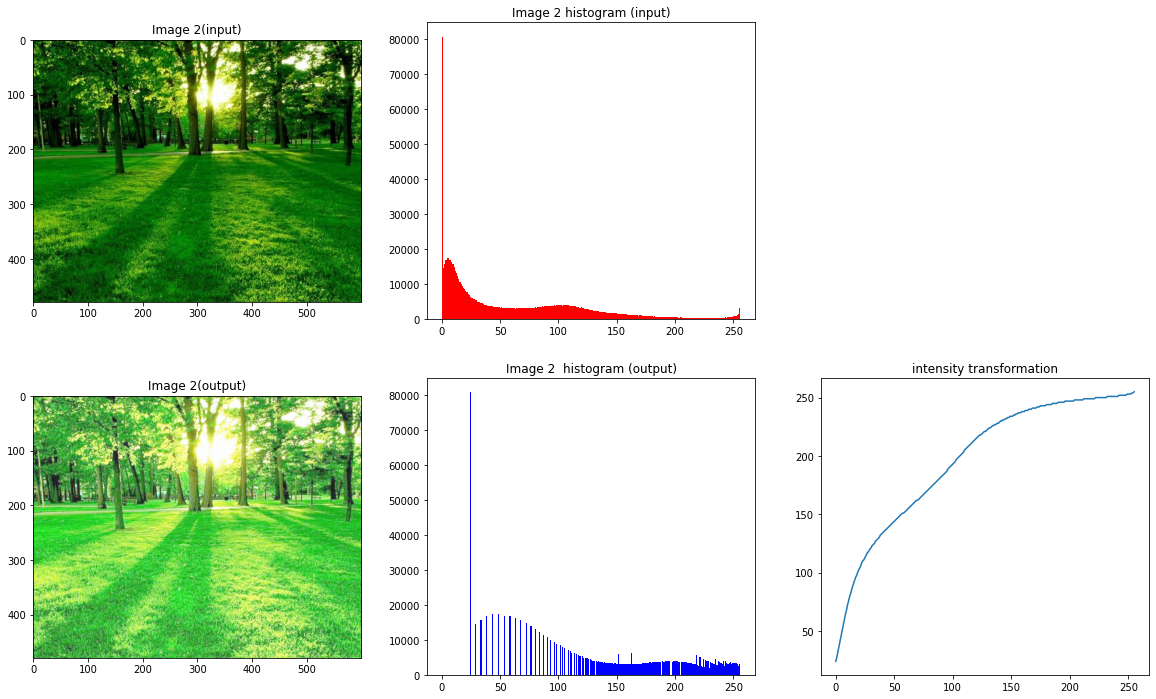

In [5]:
fig, axs = plt.subplots(2,3, figsize = (20, 12))
axs[0,0].imshow(image2)
axs[0,0].set_title('Image 2(input)')
axs[0,1].hist(image2.flatten(),256,[0,256], color = 'r')[2]
axs[0,1].set_title('Image 2 histogram (input)')
axs[1,0].imshow(histogram_equalization(image2)[0])
axs[1,0].set_title('Image 2(output)')
axs[1,1].hist(histogram_equalization(image2)[0].flatten(),256,[0,256],color='b')[2]
axs[1,1].set_title('Image 2  histogram (output)')
axs[1,2].plot(list(range(0,256)),histogram_equalization(image2)[1])
axs[1,2].set_title("intensity transformation")
fig.delaxes(axs[0,2])

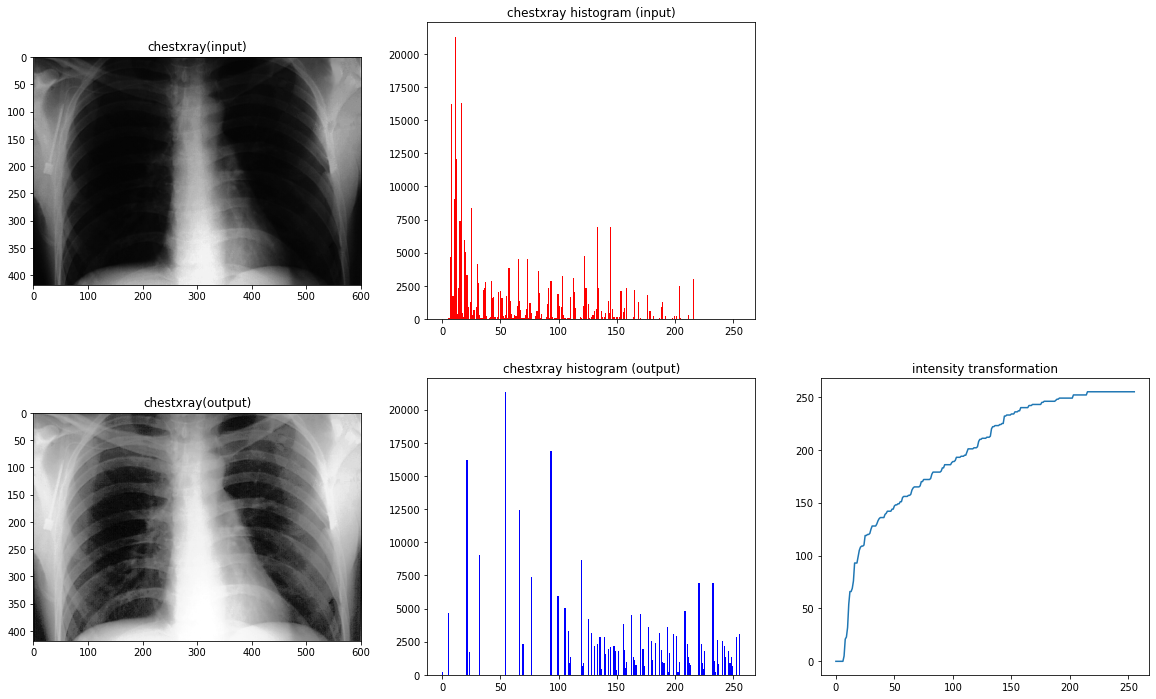

In [6]:
fig, axs = plt.subplots(2,3, figsize = (20, 12))
axs[0,0].imshow(chestxray,cmap='gray')
axs[0,0].set_title('chestxray(input)')
axs[0,1].hist(chestxray.flatten(),256,[0,256], color = 'r')[2]
axs[0,1].set_title('chestxray histogram (input)')
axs[1,0].imshow(histogram_equalization(chestxray)[0],cmap='gray')
axs[1,0].set_title('chestxray(output)')
axs[1,1].hist(histogram_equalization(chestxray)[0].flatten(),256,[0,256],color='b')[2]
axs[1,1].set_title('chestxray histogram (output)')
axs[1,2].plot(list(range(0,256)),histogram_equalization(chestxray)[1])
axs[1,2].set_title("intensity transformation")
fig.delaxes(axs[0,2])

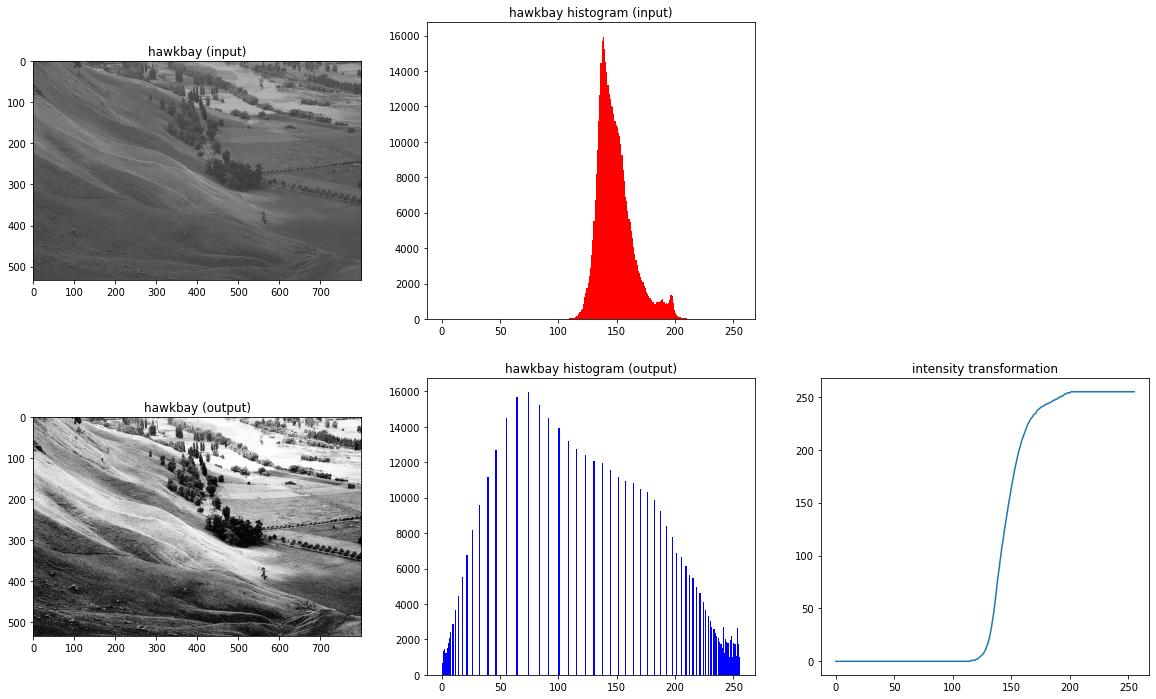

In [7]:
fig, axs = plt.subplots(2,3, figsize = (20, 12))
axs[0,0].imshow(hawkbay,cmap='gray')
axs[0,0].set_title('hawkbay (input)')
axs[0,1].hist(hawkbay.flatten(),256,[0,256], color = 'r')[2]
axs[0,1].set_title('hawkbay histogram (input)')
axs[1,0].imshow(histogram_equalization(hawkbay)[0],cmap='gray')
axs[1,0].set_title('hawkbay (output)')
axs[1,1].hist(histogram_equalization(hawkbay)[0].flatten(),256,[0,256],color='b')[2]
axs[1,1].set_title('hawkbay histogram (output)')
axs[1,2].plot(list(range(0,256)),histogram_equalization(hawkbay)[1])
axs[1,2].set_title("intensity transformation")
fig.delaxes(axs[0,2])

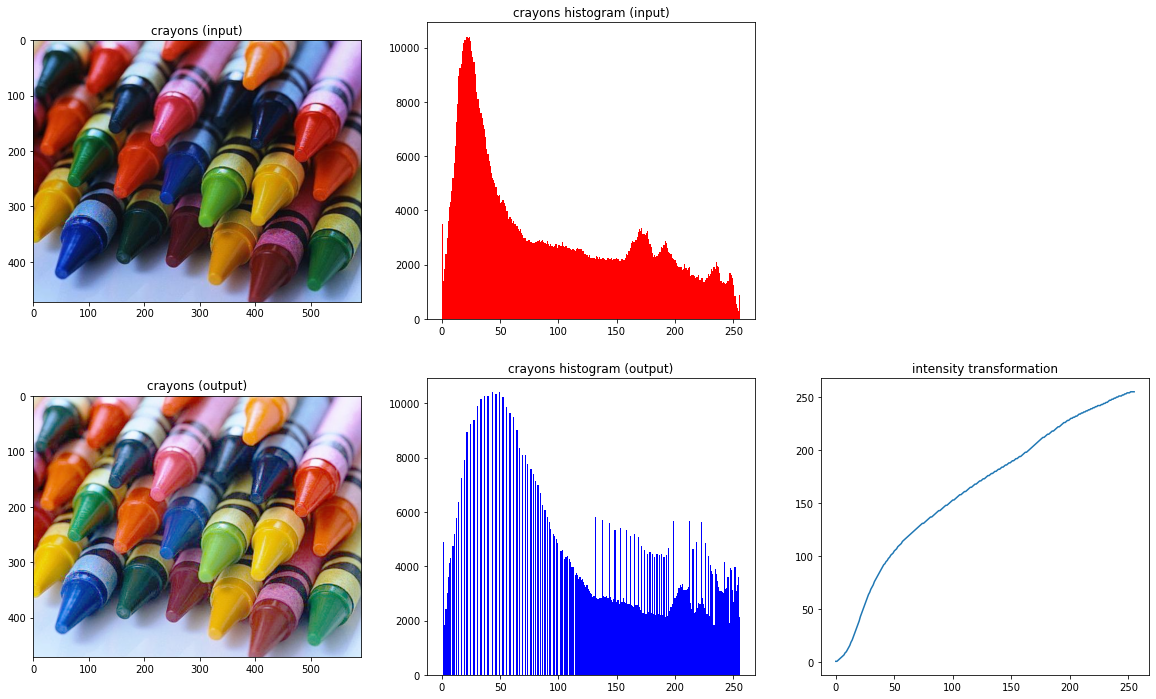

In [8]:
fig, axs = plt.subplots(2,3, figsize = (20, 12))
axs[0,0].imshow(crayons)
axs[0,0].set_title('crayons (input)')
axs[0,1].hist(crayons.flatten(),256,[0,256], color = 'r')[2]
axs[0,1].set_title('crayons histogram (input)')
axs[1,0].imshow(histogram_equalization(crayons)[0])
axs[1,0].set_title('crayons (output)')
axs[1,1].hist(histogram_equalization(crayons)[0].flatten(),256,[0,256],color='b')[2]
axs[1,1].set_title('crayons histogram (output)')
axs[1,2].plot(list(range(0,256)),histogram_equalization(crayons)[1])
axs[1,2].set_title("intensity transformation")
fig.delaxes(axs[0,2])

###2.(a) Compare your results with OpenCV’s cv2.equalizeHist() to see if you get comparable results.

Text(0.5, 1.0, 'histogram equalised (openCV )')

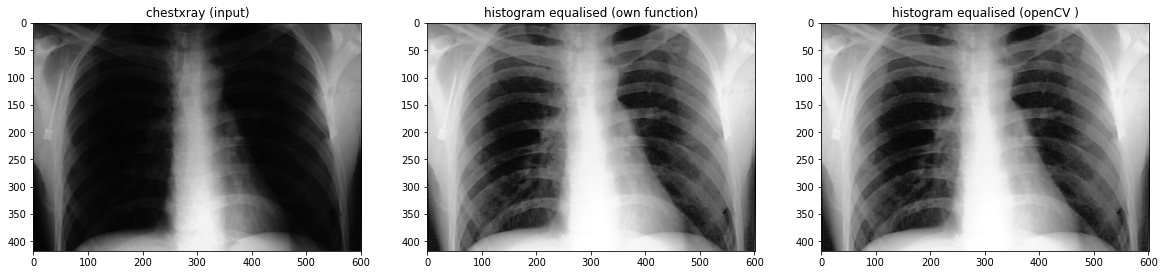

In [9]:
fig, axs = plt.subplots(1,3, figsize = (20, 10))
axs[0].imshow(chestxray,cmap='gray')
axs[0].set_title('chestxray (input)')
axs[1].imshow(histogram_equalization(chestxray)[0],cmap='gray')
axs[1].set_title('histogram equalised (own function)')
axs[2].imshow(cv2.equalizeHist(chestxray),cmap='gray')
axs[2].set_title('histogram equalised (openCV )')

Text(0.5, 1.0, 'eqalized image (OpenCV)')

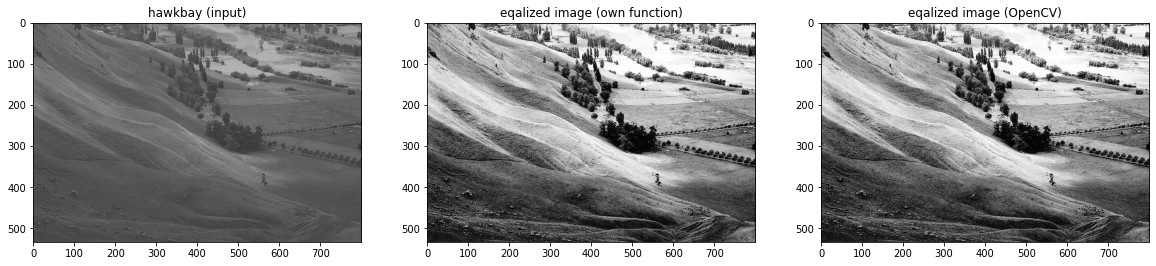

In [10]:
fig, axs = plt.subplots(1,3, figsize = (20,10))
axs[0].imshow(hawkbay,cmap='gray')
axs[0].set_title('hawkbay (input)')
axs[1].imshow(histogram_equalization(hawkbay)[0],cmap='gray')
axs[1].set_title('eqalized image (own function)')
axs[2].imshow(cv2.equalizeHist(hawkbay),cmap='gray')
axs[2].set_title('eqalized image (OpenCV)')

###(b) Is the intensity distribution of the equalized histogram a uniform distribution? Why or why not?

The intensity distribution will be uniform if we take continuous ditribution. but here the distribution is discrete so we will not get a perfect uniform distribution.

###3.a) Extract the 3 color channels for each image and plot their respective histograms (so six in all).

(array([8.9500e+04, 7.1904e+04, 4.6179e+04, 2.2143e+04, 7.6670e+03,
        2.4210e+03, 6.0900e+02, 1.4000e+02, 3.1000e+01, 6.0000e+00]),
 array([  0. ,  15.9,  31.8,  47.7,  63.6,  79.5,  95.4, 111.3, 127.2,
        143.1, 159. ]),
 <BarContainer object of 10 artists>)

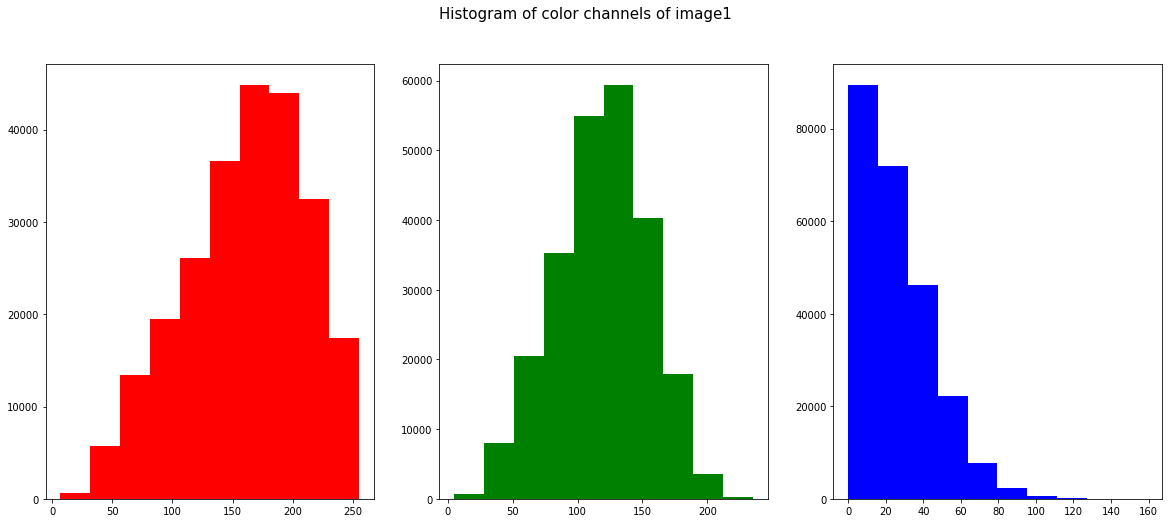

In [11]:
fig, axs = plt.subplots(1,3, figsize = (20, 8))
image1_red = cv2.split(image1)[0]
image1_green = cv2.split(image1)[1]
image1_blue = cv2.split(image1)[2]
fig.suptitle("Histogram of color channels of image1", fontsize=15)
axs[0].hist(image1_red.flatten(),color='r')
axs[1].hist(image1_green.flatten(),color = 'g')
axs[2].hist(image1_blue.flatten(),color='b')


(array([220307.,  38650.,  12942.,   5018.,   2638.,   1727.,   1515.,
          1340.,   1341.,   1922.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

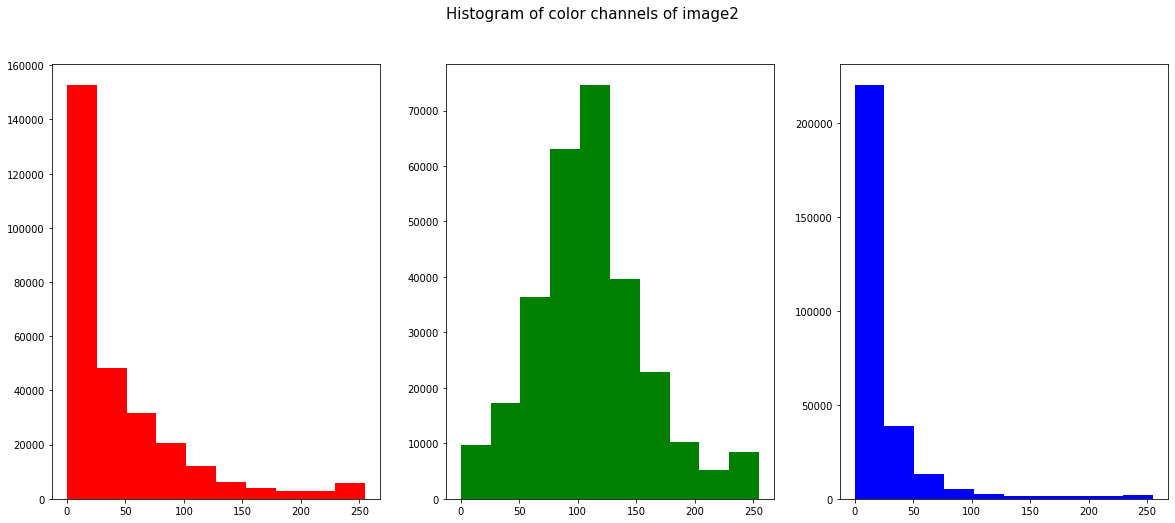

In [12]:
fig, axs = plt.subplots(1,3, figsize = (20, 8))
image2_red = cv2.split(image2)[0]
image2_green = cv2.split(image2)[1]
image2_blue = cv2.split(image2)[2]
fig.suptitle("Histogram of color channels of image2", fontsize=15)
axs[0].hist(image2_red.flatten(),color='r')
axs[1].hist(image2_green.flatten(),color = 'g')
axs[2].hist(image2_blue.flatten(),color='b')

###3 (b) For each channel, match the histograms of each colour channel of image1 with corresponding channel histograms of image2

In [13]:
# function to find the lowest intensity that matches
def find_nearest_above(my_array, target):
    diff = my_array - target
    mask = np.ma.less_equal(diff, -1)
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c # returns min index of the nearest if target is greater than any value
    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()

# Histogram matching
def match_histograms(src, dst):
 
    src_shape = src.shape
    src = src.ravel()
    dst = dst.ravel()
 
    # get the set of unique pixel values and their corresponding indices and counts
    s_values, bin_idx, s_counts = np.unique(src, return_inverse=True,return_counts=True)
    t_values, t_counts = np.unique(dst, return_counts=True)
 
    # Calculate s_k for source image
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    
    # Calculate s_k for destination image
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]
 
    # Round the values
    sour = np.around(s_quantiles*255)
    temp = np.around(t_quantiles*255)
    
    # Map the rounded values
    matched_hist = list()
    for data in sour[:]:
        matched_hist.append(find_nearest_above(temp,data))
    matched_hist = np.array(matched_hist, dtype='uint8')
 
    return matched_hist[bin_idx].reshape(src_shape)


###3(c) Reconstruct the new image1 in colour.


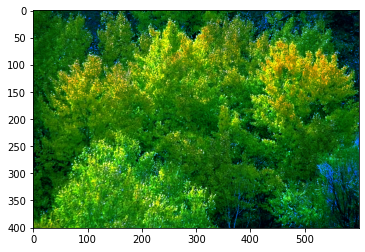

In [14]:
matched_R = match_histograms(image1_red,image2_red)
matched_G = match_histograms(image1_green, image2_green)
matched_B = match_histograms(image1_blue, image2_blue)
recombined = cv2.cvtColor(cv2.merge((matched_B, matched_G, matched_R)), cv2.COLOR_BGR2RGB)
plt.imshow(recombined)

###(d) Compare the result with the original images.

Text(0.5, 1.0, 'Transformed Image')

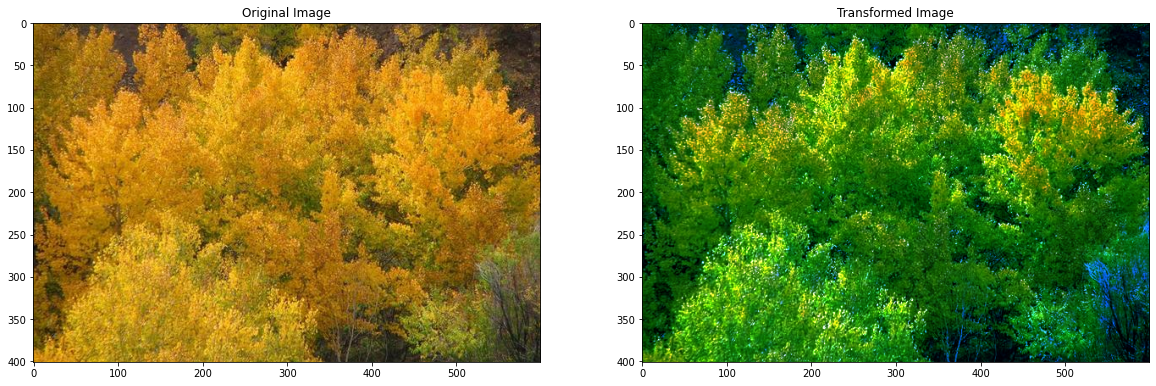

In [15]:
fig, axs = plt.subplots(1,2, figsize = (20, 8))
axs[0].imshow(image1)
axs[0].set_title("Original Image")
axs[1].imshow(recombined)
axs[1].set_title("Transformed Image")

####The newly constructed image is greener and not yellowish like the original image. This is because the blue and red colour channels of image2 are dominated significantly by the green colour channel values

### 5. Pick a grayscale image, either from the given ones or from scikit’s image repository. Perform intensity slicing on the image in two ways
(a) highlight a particular range and set the rest to zero;

In [16]:
image = data.camera()


In [17]:
i_slice = (100,160)
new_image_1=np.zeros((image.shape))
intensity = {}
value = image.shape
for i in range(value[0]):
    for j in range(value[1]):
        if i_slice[0] <= image[i,j] <= i_slice[1]:
            new_image_1[i,j] = 255
            intensity[image[i,j]] = new_image_1[i,j]
        else:
            new_image_1[i,j] = 0 
            intensity[image[i,j]] = new_image_1[i,j]   
l= dict(sorted(intensity.items(),key= lambda x:x[0],reverse=False))


Text(0.5, 1.0, 'intensity transformation')

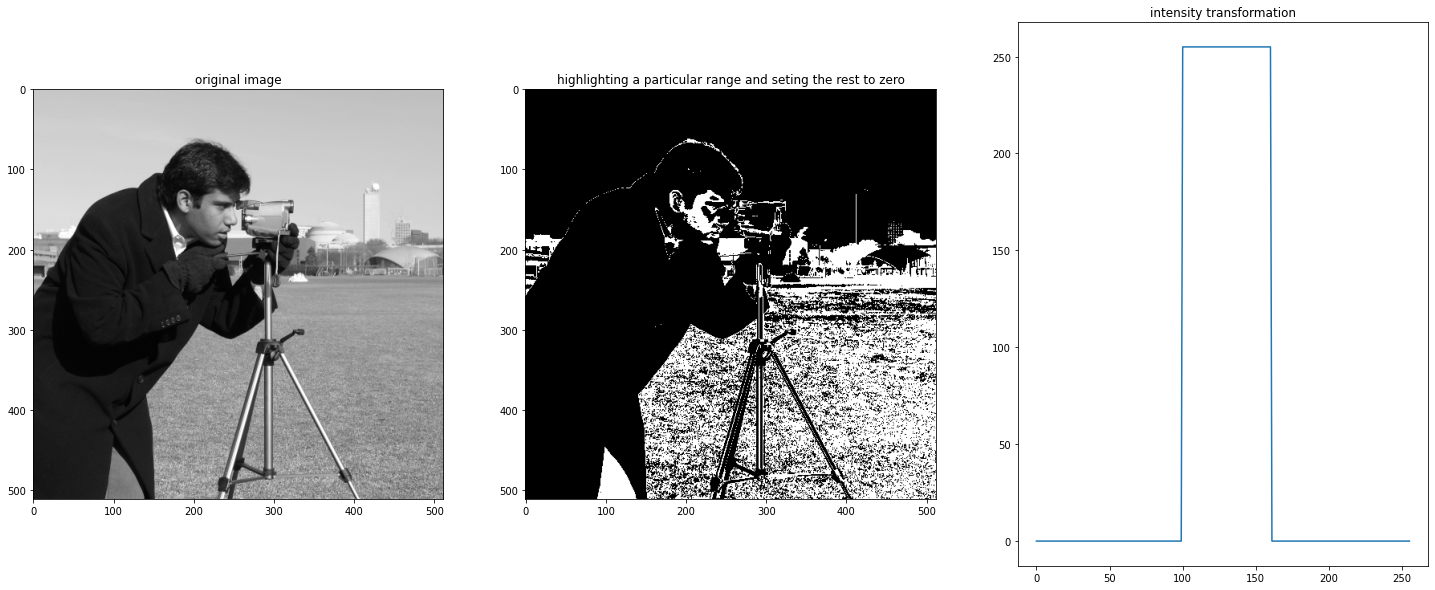

In [18]:
fig, axs = plt.subplots(1,3, figsize = (25, 10))
axs[0].imshow(image,cmap='gray')
axs[0].set_title('original image')
axs[1].imshow(new_image_1,cmap='gray')
axs[1].set_title('highlighting a particular range and seting the rest to zero')
axs[2].plot(list(range(0,256)),l.values())
axs[2].set_title("intensity transformation")

###(b) highlight a particular range and leave the rest unchanged

In [19]:
i_slice = (100,150)
new_image_2=np.zeros((image.shape))
intensity = {}
value = image.shape
for i in range(value[0]):
    for j in range(value[1]):
        if i_slice[0] <= image[i,j] <= i_slice[1]:
            new_image_2[i,j] = 255
            intensity[image[i,j]] = new_image_2[i,j]
        else:
            new_image_2[i,j] = image[i,j] 
            intensity[image[i,j]] = new_image_2[i,j]   
l1= dict(sorted(intensity.items(),key= lambda x:x[0],reverse=False))

Text(0.5, 1.0, 'intensity transformation')

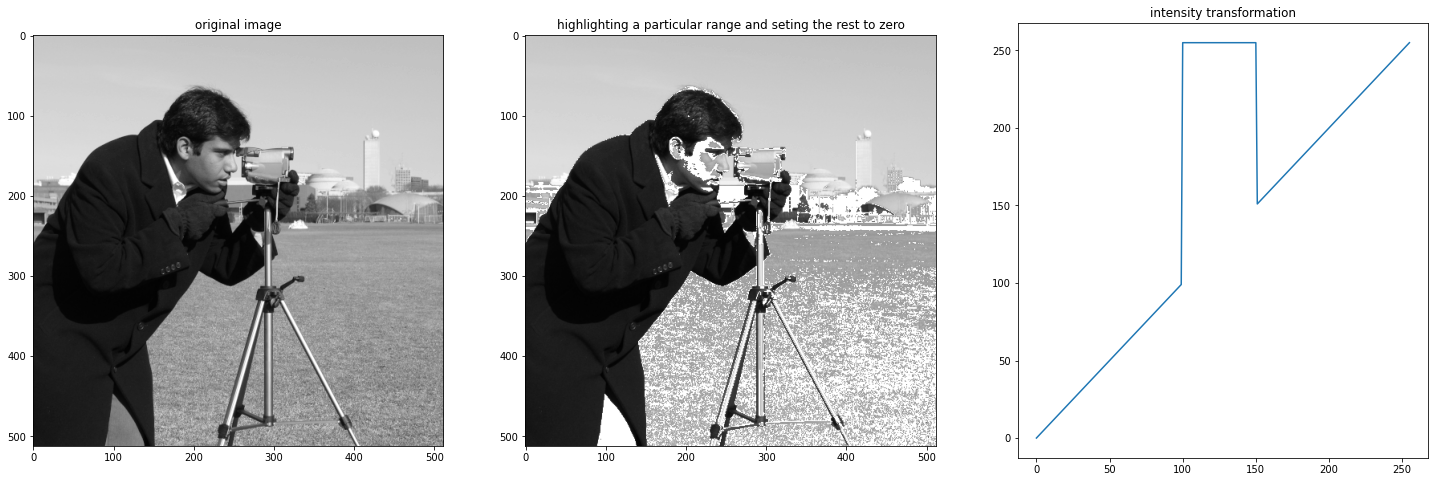

In [20]:
fig, axs = plt.subplots(1,3, figsize = (25, 8))
axs[0].imshow(image,cmap='gray')
axs[0].set_title('original image')
axs[1].imshow(new_image_2,cmap='gray')
axs[1].set_title('highlighting a particular range and seting the rest to zero')
axs[2].plot(list(range(0,256)),l1.values())
axs[2].set_title("intensity transformation")

###6. Perform bit-plane slicing on the same grayscale image used in Exercise 5.
(a) Display all the bit planes, labeling them as ‘bitplane0’(corresponding to the least significant bit) to ‘bitplane7’(corresponding to the most significant bit)

In [21]:
bit_plane = {}
for i in range(8):
    plane = np.full((image.shape[0], image.shape[1]), 2**i, np.uint8)
    temp = cv2.bitwise_and(plane, image)
    bit_plane[i] = temp

Text(0.5, 0.98, 'Bitplanes')

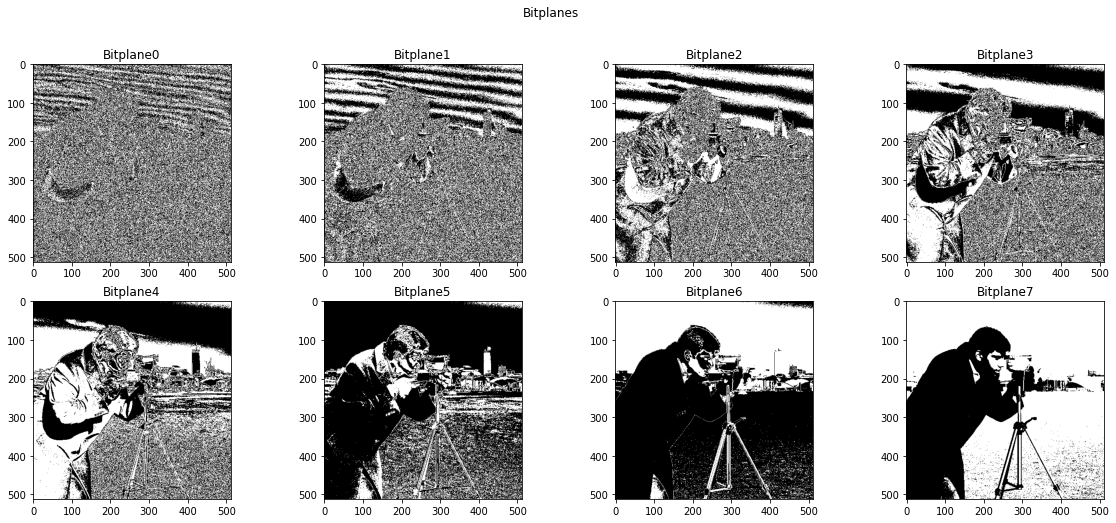

In [22]:
fig, axs = plt.subplots(2,4, figsize = (20, 8))
k=0
for i in range(2):
    for j in range(4):
        axs[i,j].imshow(bit_plane[k],cmap='gray')
        axs[i,j].set_title("Bitplane"+str(k))
        k=k+1
plt.suptitle("Bitplanes")        

(b) Plot the intensity transformation being used to extract bitplane0, bitplane3 and bitplane7.

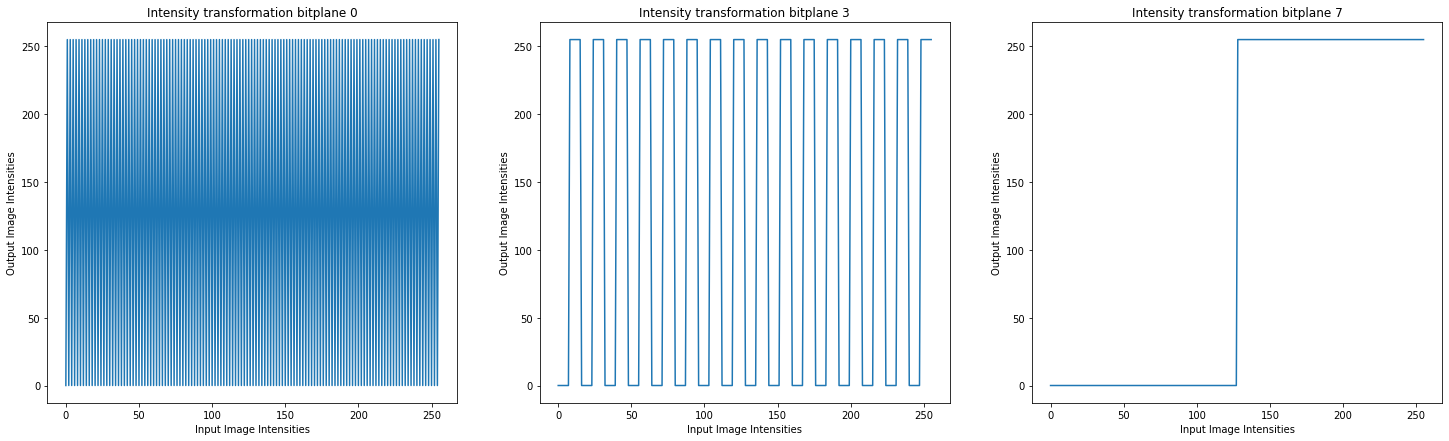

In [23]:
plane_no = [0,3,7]
fig, axs = plt.subplots(1,3, figsize = (25, 7))
t = 0 
for i in plane_no:
    new_intensity = [0]*256
    for j in range(256):
        bit = np.binary_repr(j,width=8)
        if int(bit[7-i]) == 1:
            new_intensity[j] = 255
    axs[t].plot(list(range(0,256)),new_intensity)
    axs[t].set_xlabel("Input Image Intensities")
    axs[t].set_ylabel("Output Image Intensities")
    axs[t].set_title("Intensity transformation bitplane " +str(i))
    t=t+1



(c) Try to reconstruct the image with fewer bit planes so as to visually appear as resembling the original. What is the minimum number of bit planes the you can use without degrading the image quality too much?

Text(0.5, 1.0, 'reconstruction using bitplane 4,5,6,7')

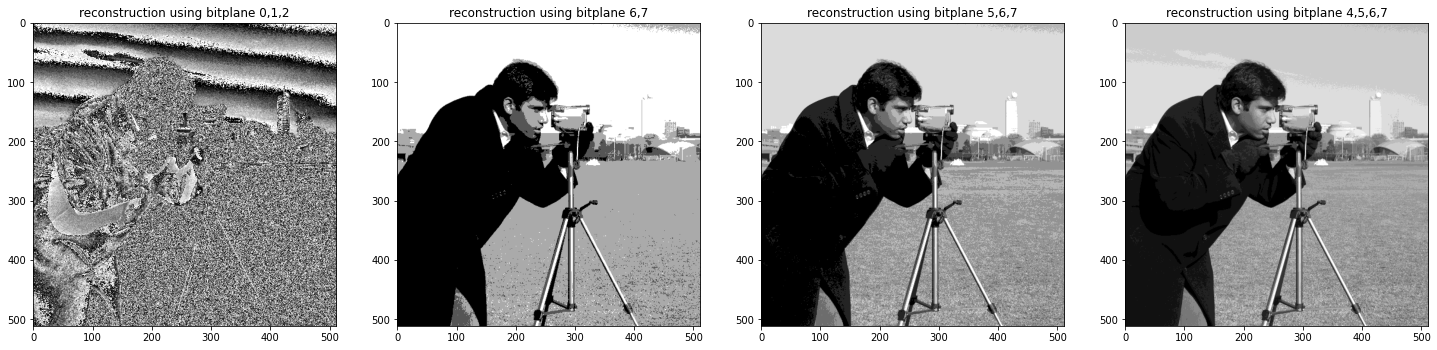

In [24]:
fig, axs = plt.subplots(1,4, figsize = (25, 7))
reconstructed_img1 = bit_plane[0]+bit_plane[1] + bit_plane[2]
reconstructed_img2 = bit_plane[6] + bit_plane[7]
reconstructed_img3 = bit_plane[5] + bit_plane[6] + bit_plane[7]
reconstructed_img4 = bit_plane[4] + bit_plane[5] + bit_plane[6] + bit_plane[7]
axs[0].imshow(reconstructed_img1,cmap = 'gray')
axs[0].set_title("reconstruction using bitplane 0,1,2")
axs[1].imshow(reconstructed_img2,cmap = 'gray')
axs[1].set_title("reconstruction using bitplane 6,7")
axs[2].imshow(reconstructed_img3,cmap = 'gray')
axs[2].set_title("reconstruction using bitplane 5,6,7")
axs[3].imshow(reconstructed_img4,cmap = 'gray')
axs[3].set_title("reconstruction using bitplane 4,5,6,7")

So we can say that if we add minimum 4 bit planes with more significant bit, then we will get an almost perfect image.